<a href="https://colab.research.google.com/github/DavidPolot/cap-comp215/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##David Polotsky
2nd Project, cellular automation of the spread of COVID

can we use cellular automation to visualize and generalize the spread of a virus like COVID

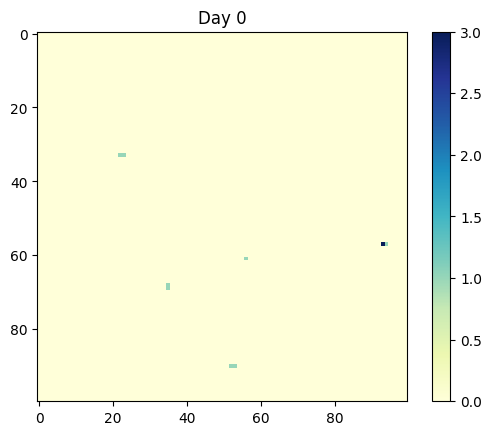

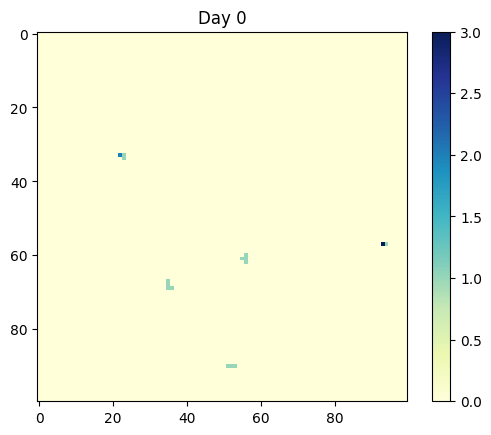

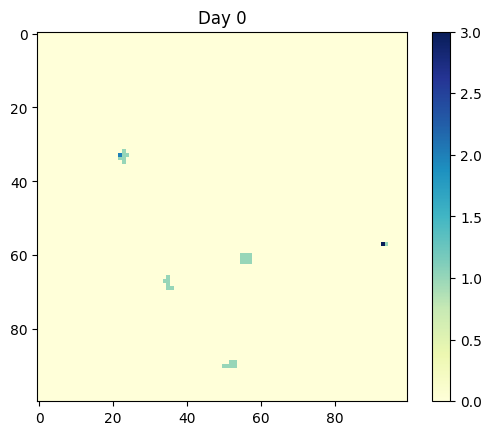

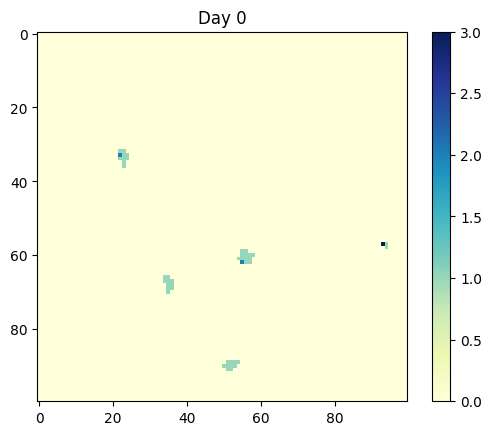

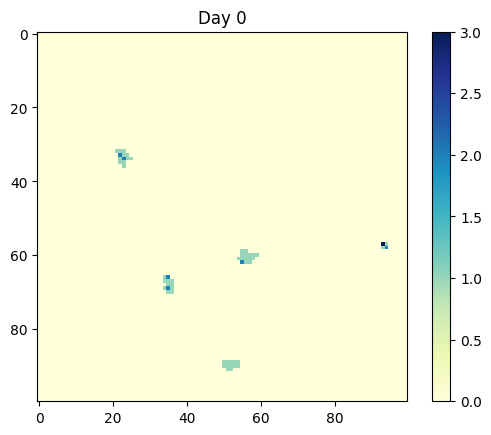

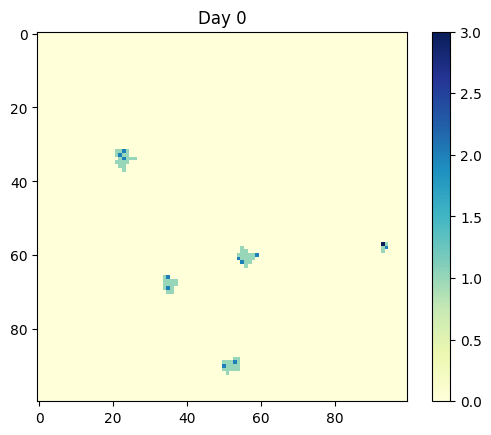

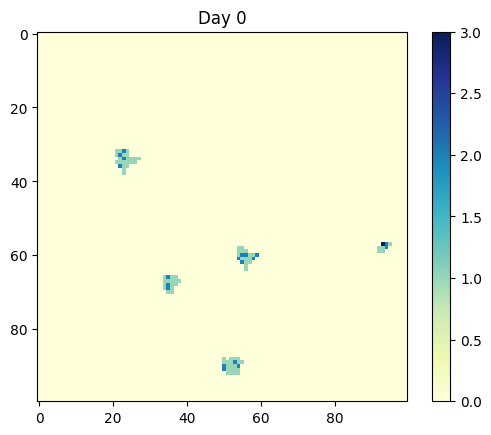

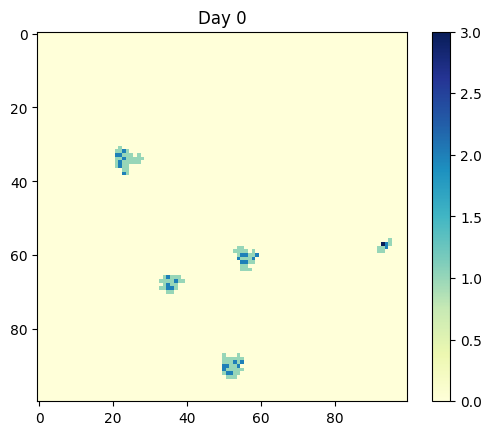

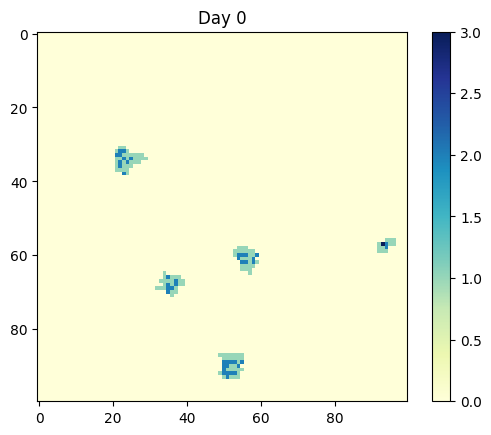

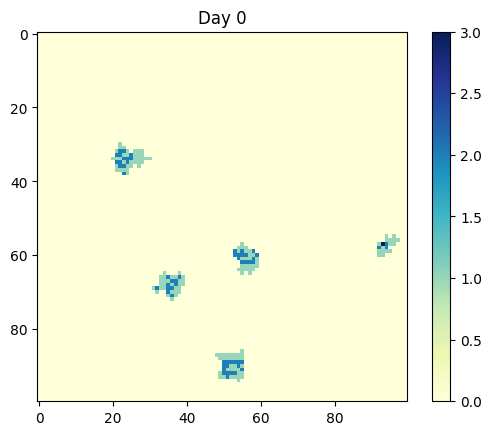

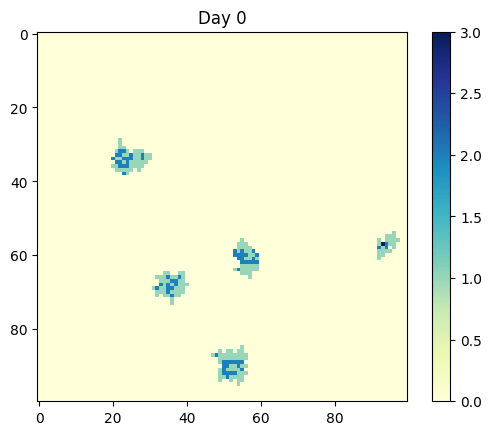

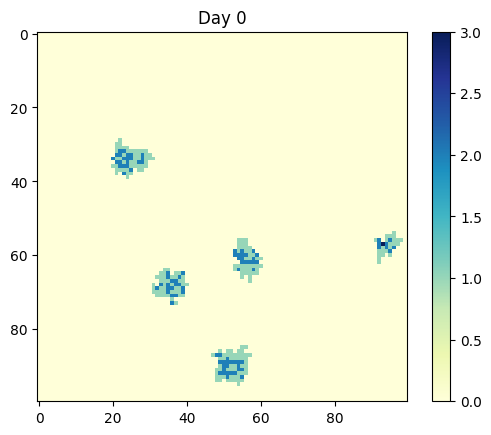

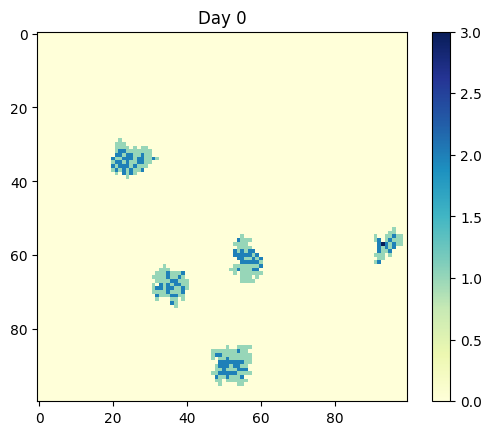

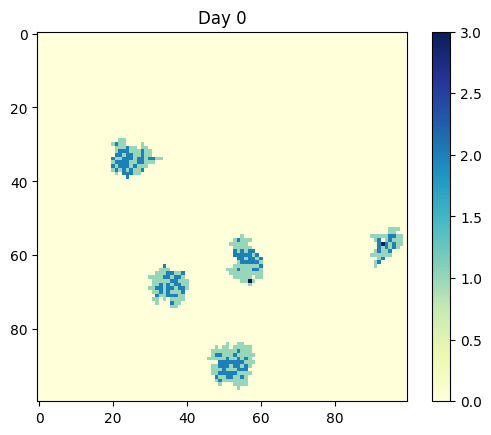

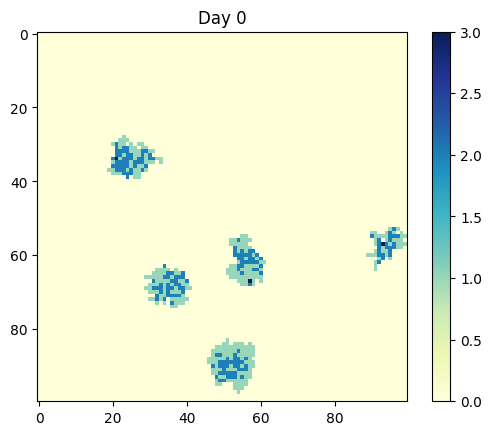

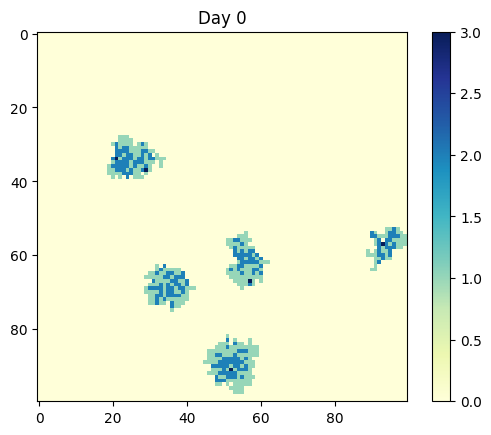

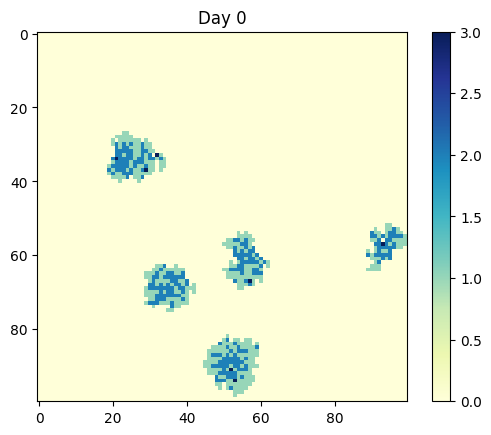

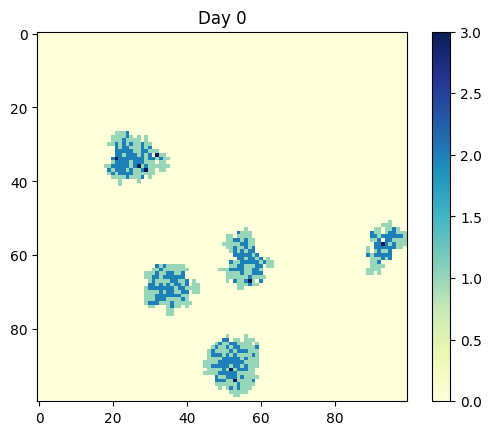

KeyboardInterrupt: 

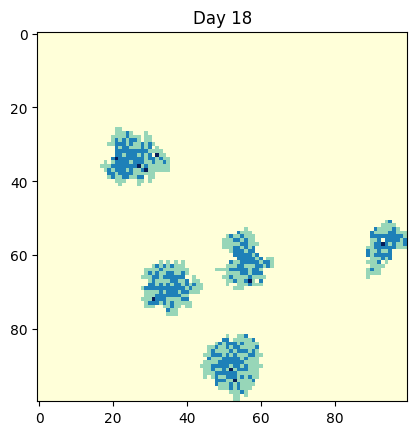

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#chatgpt help

# Parameters
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY_RATE = 0.02  # Probability of death if infected
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

# create the grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomly infect some individuals
infected_indices = np.random.choice(range(GRID_SIZE * GRID_SIZE), size=INITIAL_INFECTED, replace=False)
infected_x = infected_indices // GRID_SIZE
infected_y = infected_indices % GRID_SIZE
grid[infected_x, infected_y] = INFECTED

# Define neighborhood kernel
neighborhood = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

# Function to update grid
def update_grid(grid):
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in neighborhood:
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
                        if grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                            new_grid[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    if np.random.rand() < MORTALITY_RATE:
                        new_grid[i, j] = DEAD
                    else:
                        new_grid[i, j] = RECOVERED
    return new_grid


def display_grid(grid): #this is for displaying the grid
    plt.imshow(grid, cmap='YlGnBu')
    plt.colorbar()
    plt.title('Day 0')
    plt.show()


# i cant figure out an animation at all, I just put it in a loop
for day in range(1, 101):
    grid = update_grid(grid)
    display_grid(grid)
    plt.title('Day {}'.format(day))
